# Matriz de confusão

É uma tabela que mostra o desempenho de uma classificação de acordo com o número de previsões corretas e incorretas para cada tipo de resposta.

Sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

## Matriz binária

<img src="figures/Confusion-Matrix.png" style="width: 500px">

- TP = True Positive: Modelo previu positivo e isso é verdade
- TN = True Negative: Modelo previu negativo e isso é verdade
- FP = False Positive: Modelo previu positivo e isso é falso
- FN = False Negative: Modelo previu negativo e isso é  falso

In [50]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Supondo pacientes com covid-19:
- 0 - Paciente não infectado
- 1 - Paciente infectado

In [51]:
real = [1, 0, 1, 0, 1, 1, 0, 1]
pred = [1, 0, 1, 1, 0, 1, 1, 1]

In [52]:
conf_matrix = confusion_matrix(real, pred)

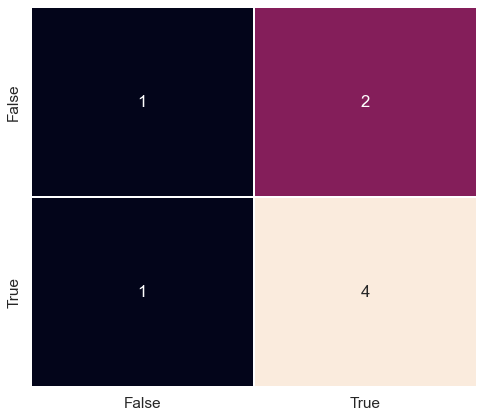

In [53]:
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.4)

sns.heatmap(
    conf_matrix, 
    annot=True, 
    cbar=False, 
    linewidths=0.2, 
    xticklabels=['False', 'True'], 
    yticklabels=['False', 'True'],
)

plt.show()

In [54]:
TN, FP, FN, TP = conf_matrix.flatten()

### Acurácia

Respresenta o percentual de acerto de um modelo

<center style="font-size: 20px">
    Acurácia $= \frac{TN + TP}{TN + TP + FN + FP}$
</center>

In [55]:
def accuracy(TN, FP, FN, TP):
    return (TN + TP) / (TN + TP + FN + FP)

### Precisão

Informa quantas da amostras previstas como positivas realmente são positivas. Usada em casos em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.

Ex.: Decisão de um investimento

<center style="font-size: 20px">
    Precisão $= \frac{TP}{TP + FP}$
</center>

In [56]:
def precision(TP, FP):
    return TP / (TP + FP)

### Recall

Mede o quantoum modelo classifica corretamente os Verdadeiros Positivos. Usado em que queremos evitar Falsos Negativos.

Ex.: Classificar um passiente com Covid-19 como se ele não estivesse contaminado (Falso Negativo) é muito mais prejudicial que o contrário.
<br>
<br>
<center style="font-size: 20px">
    Recall $= \frac{TP}{TP + FN}$
</center>

In [57]:
def recall(TP, FN):
    return TP / (TP + FN)

### f1 score

É uma média harmônica entre a Precisão e o Recall. Precisão e Recall são inversamente proporcionais, logo o f1 score nos dá a informação de quando ou Recall ou a Precisão não estão muito baixos. Ou seja, caso queiramos o equilíbrio entre Recall e Precisão, maximizamos o f1 score.
<br>
<br>
<center style="font-size: 20px">
    f1score $= 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}$
</center>

In [58]:
def f1_score(TP, FP, FN):
    rec = recall(TP, FN)
    prc = precision(TP, FP)
    
    return 2 * (prc * rec) / (prc + rec)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
print(f"Acurácia: {accuracy_score(real, pred):.3f}")

Acurácia: 0.625


In [61]:
print(f"Precisão: {precision_score(real, pred):.3f}")

Precisão: 0.667


In [62]:
print(f"Recall: {recall_score(real, pred):.3f}")

Recall: 0.800


In [63]:
print(f"F1 Score: {f1_score(real, pred):.3f}")

F1 Score: 0.727


## Matriz não binária

<img src="figures/Confusion-Matrix-NonBinary.png" style="width: 500px">

- Apple = 0
- Orange = 1
- Mango = 2

In [64]:
real = [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
pred = [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

conf_matrix = confusion_matrix(real, pred)

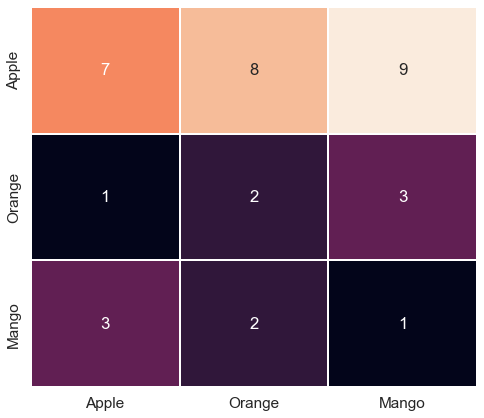

In [65]:
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.4)

sns.heatmap(
    conf_matrix.T, 
    annot=True, 
    cbar=False, 
    linewidths=0.2, 
    xticklabels=['Apple', 'Orange', 'Mango'], 
    yticklabels=['Apple', 'Orange', 'Mango'],
)

plt.show()

In [66]:
print(f"Acurácia: {accuracy_score(real, pred):.3f}")

Acurácia: 0.278
